# 5NN CODE

#### Aim: For every galaxy in the catalog, find its 5th nearest projected neighbor within some velocity/redshift range of that galaxy.

#### Notes
--redshift slice for each galaxy can be physically motivated at the outset!

---what is biggest velocity dispersion we could expect? Coma velocity dispersion ~1100 km/s

---largest velocity dispersion we expect galaxies to physically have. Coma (MASSIVE CLUSTER) is a great reference for this. ~1100 km/s. use ~2000 km/s for 2-sigma

-----ACTUALLY. for now, +/- 500 km/s.

5NN projected distance is a biased indicator based on density. Clusters very dense, but if we reduce redshift slice too much we remove nearby galaxies with massive velocity dispersions. In less dense environments, a small redshift would be helpful - too large and we include galaxies that are not, in fact, nearby.

#### 5 Nearest Neighbor Density Equation:

$\Sigma_{5\text{NN}} = \frac{5}{\pi r_5^2}$

- units: Mpc$^{-2}$

- $r_5$ = distance to 5th nearest neighbor

#### Summarizing the order of 5NN operations:

- For some galaxy with redshift, RA, DEC, 
    - isolate_galaxy_region(cat, redshift, RA, DEC)
        - will take cat and apply the redshift and RA+DEC flags
        - galaxies within +/- 500 km/s, 3 Mpc
        - outputs sliced_cat
    - calc_projected_distance(main_RA, main_DEC, sliced_catalog)
        - central galaxy's RA, DEC == main_RA, main_DEC
        - sliced_cat is taken from isolate_galaxy_region()
        - output is a list of projected distances from central galaxy to every galaxy in sliced_catalog
    - calc_5NN(projected_distances, redshift)
        - finds 5th nearest neighbor in the projected distances list and calculates the 5NN density 
        - if len(list) < 5 after removing the central galaxy projected distance (which is 0), set 5NN density to NaN
        - uses redshift to convert r_5 from degrees back to Mpc -- assumes distance to 5NN galaxy is same as distance to central galaxy (not a problem since we are only concerned with PROJECTED distances)

In [ ]:
%run kNN_local_density.py -vr_limit 500 -k 3

-vr_limit [int in km/s; default is 500] -radius_limit [int in Mpc; default is 100 (no radius bounds)] -k [int; default is 5 (for fifth nearest neighbor]
Using vr_limit = 500 km/s
Using radius_limit = 100 Mpc --> no limit!
Using k = 3


In [ ]:
%run kNN_local_density.py -vr_limit 500 -k 5

In [604]:
#plot_kNN(k,ra,dec,all_kNN)

In [523]:
fig.savefig(homedir+'/Desktop/fig4.png')

In [398]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#to run below, need to run with -k 5 (then set all_kNN to variable kNN_vals_5)
#followed by -k 3 (then set all_kNN to variable kNN_vals_3)

<Figure size 640x480 with 0 Axes>

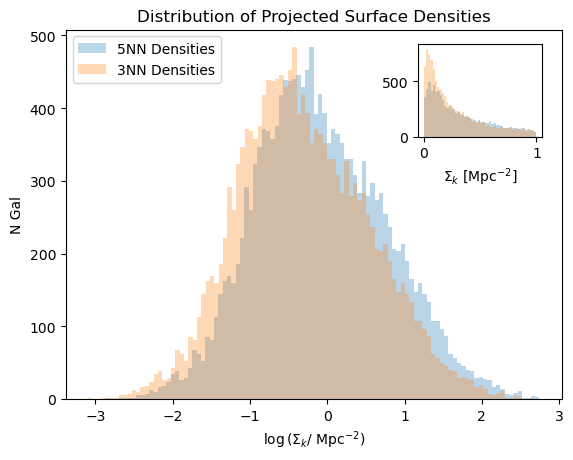

In [602]:
plt.figure()
fig,ax=plt.subplots()
im1 = ax.hist(np.log10(kNN_vals_5),bins=100,alpha=0.3,label='5NN Densities')
im2 = ax.hist(np.log10(kNN_vals_3),bins=100,alpha=0.3,label='3NN Densities')

ins = ax.inset_axes([0.71,0.71,0.25,0.25])
ins.hist(kNN_vals_5[kNN_vals_5<1.],bins=50,alpha=0.3)
ins.hist(kNN_vals_3[kNN_vals_3<1.],bins=50,alpha=0.3)

ins.set_xlabel(r'$\Sigma_k$ [Mpc$^{-2}$]')

plt.title(r'Distribution of Projected Surface Densities')
plt.xlabel(r'$\log$($\Sigma_k$/ Mpc$^{-2})$')
plt.ylabel('N Gal')
plt.legend(loc='upper left')

plt.show()